In [1]:
getwd()

[1] "D:/biological data analysis/Parasites"

In [2]:
library(ggplot2)
library(repr)
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(ggrepel))

Warning message:
"package 'ggrepel' was built under R version 4.0.4"


In [3]:
histo<-read.table("all_histone_merged_ggplot.txt",header=T,sep="\t",quote="")
head(histo)

,Symbol,logFC,test,stage,parasite
,<chr>,<dbl>,<int>,<chr>,<chr>
1,GCN5A,-0.5150238,-1,Bradyzoite,Toxoplasma gondii
2,GCN5B,-0.3017049,0,Bradyzoite,Toxoplasma gondii
3,HDAC1,-0.9060612,-1,Bradyzoite,Toxoplasma gondii
4,HDAC2,0.5310822,1,Bradyzoite,Toxoplasma gondii
5,HDAC3,0.8948019,1,Bradyzoite,Toxoplasma gondii
6,HDAC5,0.4012351,0,Bradyzoite,Toxoplasma gondii


In [4]:
unique(histo$stage)

[1] "Bradyzoite"          "Tachyzoite"          "Initial amastigote" 
[4] "Final amastigote"    "asexual blood stage" "amastigotes"        
[7] "trypomastigotes"

In [5]:
unique(histo$parasite)

[1] "Toxoplasma gondii"     "Leishmania donovani"   "Plasmodium falciparum"
[4] "Trypanosoma cruzi"

Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


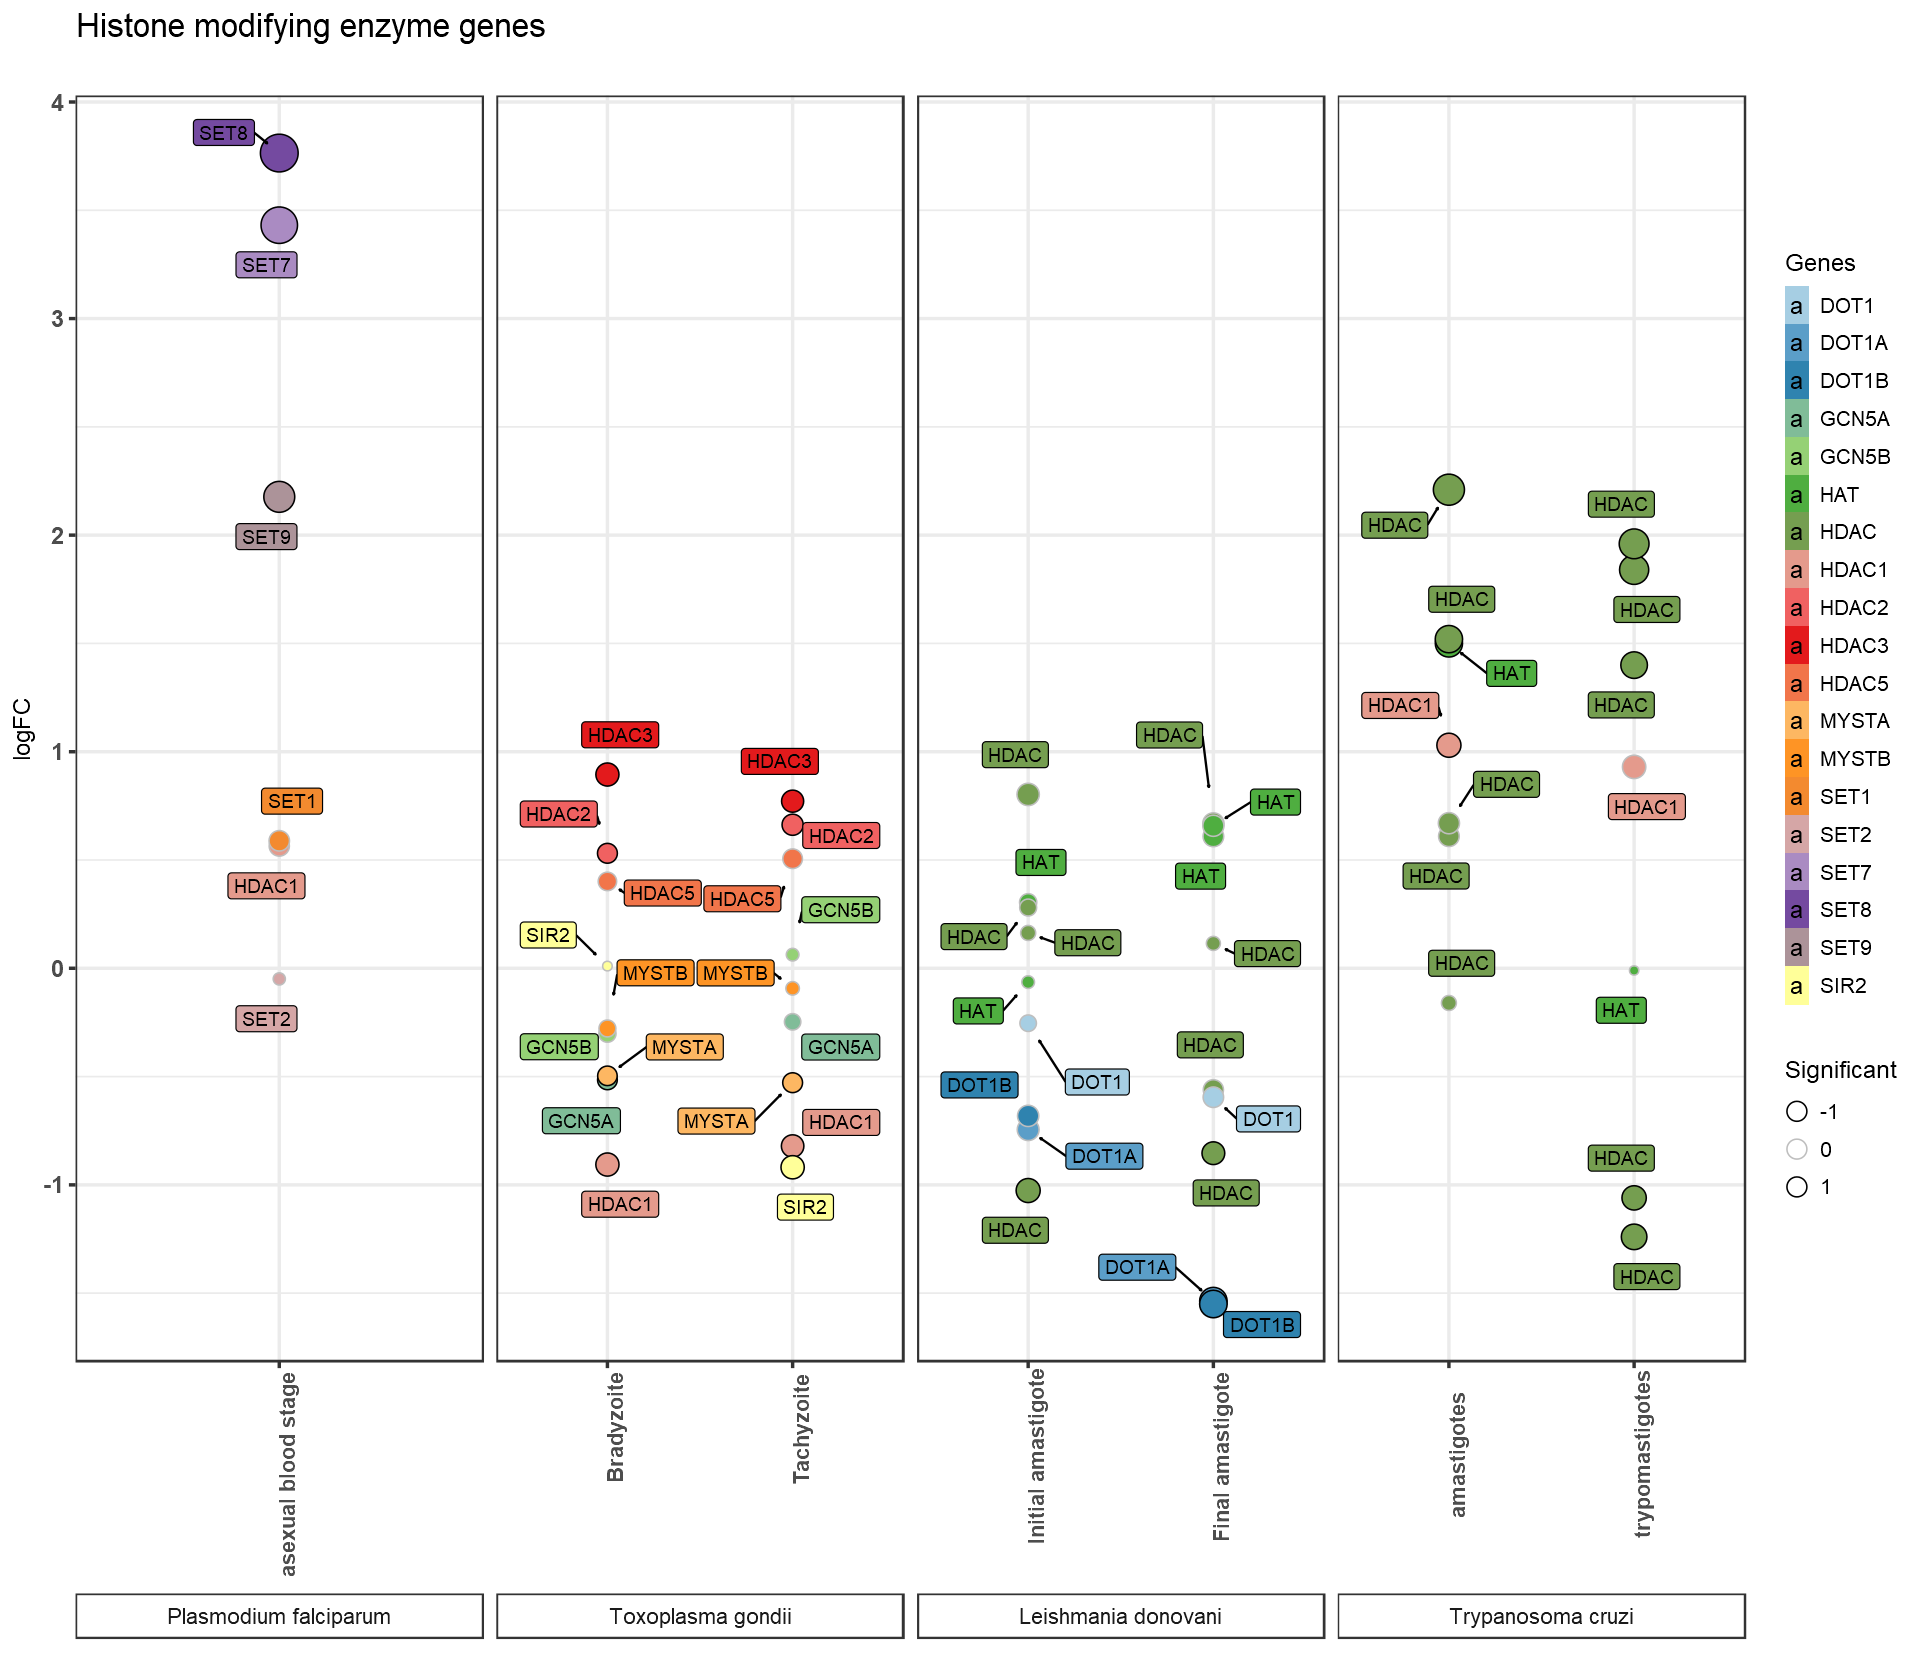

In [6]:
# svg(file="results/HistoneRelatedPLot.svg") 
options(repr.plot.width=16,repr.plot.height=14)

theme_set(theme_bw(base_size = 16))  # pre-set the bw theme.
x_axis_order<- unique(histo$stage)
x_parasite_order <- c('Plasmodium falciparum','Toxoplasma gondii','Leishmania donovani','Trypanosoma cruzi')
size<-abs(histo$logFC)
Significant<-factor(histo$test)
Genes<-histo$Symbol
custom_colour <- c('aliceblue','antiquewhite1','darksalmon','darkseagreen','darkolivegreen','chartreuse','blue2',
                   'brown4','deeppink','cadetblue1','blue4','coral3','darkgoldenrod1','darkkhaki','deeppink4',
                   'darkorchid','darkolivegreen1','darkgrey','darkgoldenrod')
colourCount = length(unique(histo$Symbol))
getPalette = colorRampPalette(brewer.pal(11, "Paired"))
g <- ggplot(histo, aes(factor(stage, level = x_axis_order),
                                   logFC))+
    geom_point(aes(fill=Genes,size=size,col=Significant),shape=21) +
    facet_grid(~factor(parasite, level = x_parasite_order), 
             scales = "free_x", # Let the x axis vary across facets.
#              space = "free_x",  # Let the width of facets vary and force all bars to have the same width.
             switch = "x") +    # Move the facet labels to the bottom.

    scale_colour_manual(values = c("black", "gray", "black"))+
#     scale_fill_manual(values= custom_colour)+
    scale_fill_manual(values= getPalette(colourCount))+
    geom_label_repel(aes(label = Genes, fill = Genes),
                    label.padding = 0.25,
                    box.padding = unit(1, "lines"),
                    point.padding = unit(1, "lines"),
                    arrow = arrow(length = unit(0.03, 'cm'), type = 'closed'),
                    max.overlaps = 20,
                    min.segment.length = 0.1
                    )+

    guides(size = FALSE, fill = guide_legend(override.aes = list(size=5)),
          color = guide_legend(override.aes = list(size=5)))+

    theme(axis.text.x = element_text(face="bold",size=13,angle=90),
          axis.text.y = element_text(face="bold",size=14),
          legend.title = element_text(color="black",size = 14),
          legend.text = element_text(color = "black", size = 12),
          legend.key.size = unit(0.8, "cm"),
#           legend.key.size = unit(3,"line"),
          legend.key.width = unit(0.5,"cm") ,
          axis.text=element_text(size=12),
          axis.title=element_text(size=14),
          strip.placement = "outside",     # Place facet labels outside x axis labels.
          strip.background = element_rect(fill = "white"),  # Make facet label background white.
         )+
    scale_size(range = c(2,10))+

  labs(title="Histone modifying enzyme genes",
       subtitle="", 
       y="logFC",
       x=""
      )
g

In [7]:
ggsave(file="AllParasiteHistoneLabeledPlot.svg", plot=g, width=16, height=14)

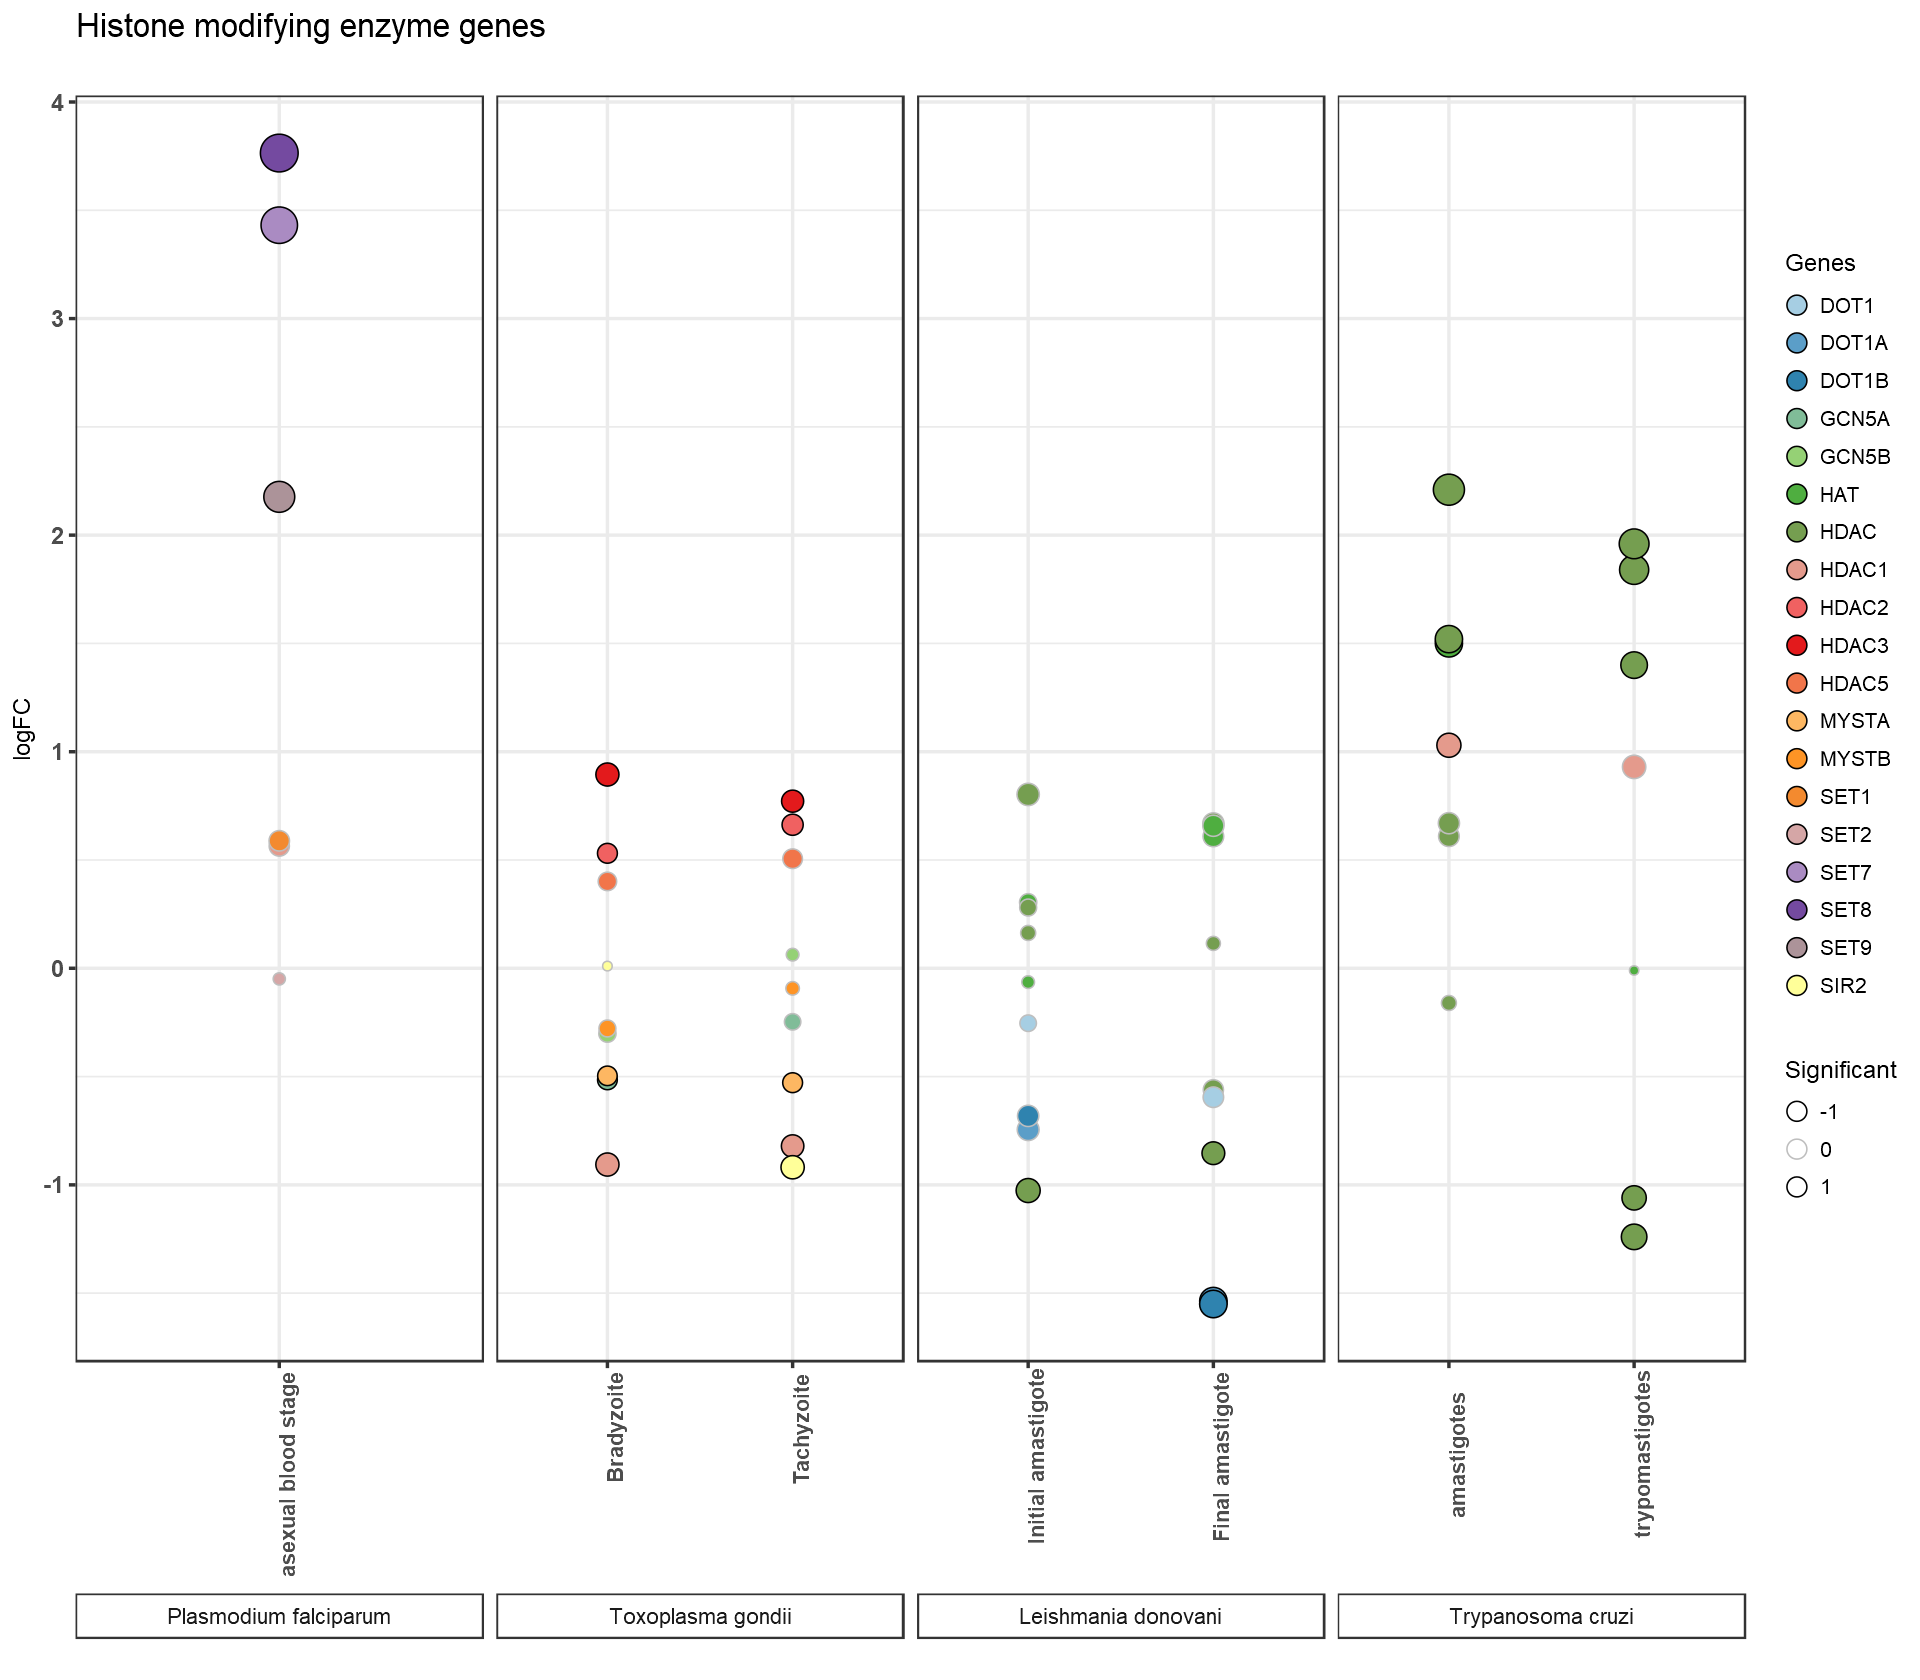

In [8]:
# svg(file="results/HistoneRelatedPLot.svg") 
options(repr.plot.width=16,repr.plot.height=14)

theme_set(theme_bw(base_size = 16))  # pre-set the bw theme.
x_axis_order<- unique(histo$stage)
x_parasite_order <- c('Plasmodium falciparum','Toxoplasma gondii','Leishmania donovani','Trypanosoma cruzi')
size<-abs(histo$logFC)
Significant<-factor(histo$test)
Genes<-histo$Symbol
custom_colour <- c('aliceblue','antiquewhite1','darksalmon','darkseagreen','darkolivegreen','chartreuse','blue2',
                   'brown4','deeppink','cadetblue1','blue4','coral3','darkgoldenrod1','darkkhaki','deeppink4',
                   'darkorchid','darkolivegreen1','darkgrey','darkgoldenrod')
colourCount = length(unique(histo$Symbol))
getPalette = colorRampPalette(brewer.pal(11, "Paired"))
g <- ggplot(histo, aes(factor(stage, level = x_axis_order),
                                   logFC))+
    geom_point(aes(fill=Genes,size=size,col=Significant),shape=21) +
    facet_grid(~factor(parasite, level = x_parasite_order), 
             scales = "free_x", # Let the x axis vary across facets.
#              space = "free_x",  # Let the width of facets vary and force all bars to have the same width.
             switch = "x") +    # Move the facet labels to the bottom.

    scale_colour_manual(values = c("black", "gray", "black"))+
#     scale_fill_manual(values= custom_colour)+
    scale_fill_manual(values= getPalette(colourCount))+

    guides(size = FALSE, fill = guide_legend(override.aes = list(size=5)),
          color = guide_legend(override.aes = list(size=5)))+

    theme(axis.text.x = element_text(face="bold",size=13,angle=90),
          axis.text.y = element_text(face="bold",size=14),
          legend.title = element_text(color="black",size = 14),
          legend.text = element_text(color = "black", size = 12),
          legend.key.size = unit(0.8, "cm"),
#           legend.key.size = unit(3,"line"),
          legend.key.width = unit(0.5,"cm") ,
          axis.text=element_text(size=12),
          axis.title=element_text(size=14),
          strip.placement = "outside",     # Place facet labels outside x axis labels.
          strip.background = element_rect(fill = "white"),  # Make facet label background white.
         )+
    scale_size(range = c(2,10))+

  labs(title="Histone modifying enzyme genes",
       subtitle="", 
       y="logFC",
       x=""
      )
g

In [9]:
ggsave(file="AllParasiteHistonePlot.svg", plot=g, width=16, height=14)

In [10]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19041)

Matrix products: default

locale:
[1] LC_COLLATE=English_India.1252  LC_CTYPE=English_India.1252   
[3] LC_MONETARY=English_India.1252 LC_NUMERIC=C                  
[5] LC_TIME=English_India.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gdtools_0.2.3      ggrepel_0.9.1      RColorBrewer_1.1-2 repr_1.1.3        
[5] ggplot2_3.3.3     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5        pillar_1.4.7      compiler_4.0.3    base64enc_0.1-3  
 [5] tools_4.0.3       digest_0.6.27     uuid_0.1-4        jsonlite_1.7.2   
 [9] evaluate_0.14     lifecycle_0.2.0   tibble_3.0.4      gtable_0.3.0     
[13] pkgconfig_2.0.3   rlang_0.4.9       IRdisplay_1.0     IRkernel_1.1.1   
[17] withr_2.4.0       dplyr_1.0.2       systemfonts_0.3.2 generics_0.1.0   
[21] vctrs_0.3.6       gri